# **Classification of Subcribers and Non Subcribers for a Bank Marketing Campaign Data Using Logistic Regression**

**Importing all the required libraries**

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

**Data Preparation**

In [ ]:
#Loading the dataset, each value in the dataset is separated by a ";"
bank_df=pd.read_csv("/content/bank-additional-full.csv", sep=";")
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
#Data Dimensions
bank_df.shape

#Number of features: 21; Number of records: 41188

(41188, 21)

In [ ]:
#Data Types of the Features
bank_df.dtypes

#Numeric features: 10(integers-5, float-5); Categorical features: 11

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#Checking for duplicate records
print(bank_df.duplicated().sum())

#Removing the 12 duplicate records
bank_df.drop_duplicates(inplace=True)

12


In [ ]:
#Dropping the duration feature

#Duration indicates the current campaign's last call duration in seconds. 
#Before making the call, the goal is to predict which potential customers are likely to subscribe. 
#This variable has a large impact on the dependent variable because the outcome is known after the call, 
#so it is removed for realistic prediction results.

bank_df.drop("duration",axis=1,inplace=True)

In [ ]:
#Renaming certain columns
bank_df.rename(columns={'marital':'marital_status','default':'credit_default','housing':'housing_loan',	
'loan':'personal_loan','contact':'curr_camp_contact_mode','month':'curr_camp_last_contact_month',	
'day_of_week':'curr_camp_last_contact_day','campaign':'curr_camp_contacts',
'pdays':'prev_camp_days','previous':'prev_camp_contacts','poutcome':'prev_camp_outcome',	
'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'no_of_emp',	
'y':'curr_camp_outcome'}, inplace=True)
bank_df.columns

Index(['age', 'job', 'marital_status', 'education', 'credit_default',
       'housing_loan', 'personal_loan', 'curr_camp_contact_mode',
       'curr_camp_last_contact_month', 'curr_camp_last_contact_day',
       'curr_camp_contacts', 'prev_camp_days', 'prev_camp_contacts',
       'prev_camp_outcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'no_of_emp', 'curr_camp_outcome'],
      dtype='object')

In [ ]:
#Summary statistics of the numeric features
bank_df.describe()

age  curr_camp_contacts  prev_camp_days  prev_camp_contacts  \
count  41176.00000        41176.000000    41176.000000        41176.000000   
mean      40.02380            2.567879      962.464810            0.173013   
std       10.42068            2.770318      186.937102            0.494964   
min       17.00000            1.000000        0.000000            0.000000   
25%       32.00000            1.000000      999.000000            0.000000   
50%       38.00000            2.000000      999.000000            0.000000   
75%       47.00000            3.000000      999.000000            0.000000   
max       98.00000           56.000000      999.000000            7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m     no_of_emp  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
#Summary of the categorical features
bank_df.describe(include=['object'])

job marital_status          education credit_default housing_loan  \
count    41176          41176              41176          41176        41176   
unique      12              4                  8              3            3   
top     admin.        married  university.degree             no          yes   
freq     10419          24921              12164          32577        21571   

       personal_loan curr_camp_contact_mode curr_camp_last_contact_month  \
count          41176                  41176                        41176   
unique             3                      2                           10   
top               no               cellular                          may   
freq           33938                  26135                        13767   

       curr_camp_last_contact_day prev_camp_outcome curr_camp_outcome  
count                       41176             41176             41176  
unique                          5                 3                 2  
top                           thu       nonexistent                no  
freq                         8618             35551             36537

In [ ]:
#Frquency for each of the levels in the categorical features
for feature in bank_df.columns:
  if bank_df[feature].dtypes == "object":
    print(bank_df[feature].value_counts(dropna=False).to_frame(),"\n")

                 job
admin.         10419
blue-collar     9253
technician      6739
services        3967
management      2924
retired         1718
entrepreneur    1456
self-employed   1421
housemaid       1060
unemployed      1014
student          875
unknown          330 

          marital_status
married            24921
single             11564
divorced            4611
unknown               80 

                     education
university.degree        12164
high.school               9512
basic.9y                  6045
professional.course       5240
basic.4y                  4176
basic.6y                  2291
unknown                   1730
illiterate                  18 

         credit_default
no                32577
unknown            8596
yes                   3 

         housing_loan
yes             21571
no              18615
unknown           990 

         personal_loan
no               33938
yes               6248
unknown            990 

           curr_camp_contact_mode
c

**Identifying And Treating Missing Values**

In [ ]:
#Identifying the missing values
print(bank_df.isnull().sum())

age                             0
job                             0
marital_status                  0
education                       0
credit_default                  0
housing_loan                    0
personal_loan                   0
curr_camp_contact_mode          0
curr_camp_last_contact_month    0
curr_camp_last_contact_day      0
curr_camp_contacts              0
prev_camp_days                  0
prev_camp_contacts              0
prev_camp_outcome               0
emp_var_rate                    0
cons_price_idx                  0
cons_conf_idx                   0
euribor3m                       0
no_of_emp                       0
curr_camp_outcome               0
dtype: int64


In [ ]:
#Replacing the 'unknown' levels with null values to identify the number of missing values in the dataset
missing_vars=['job','marital_status','education','housing_loan','personal_loan']
for feature in missing_vars:
  bank_df[feature]=bank_df[feature].replace('unknown',np.nan)
print(bank_df.isnull().sum())

#Replacing the null values with the mode 
bank_df=bank_df.fillna(bank_df.mode().iloc[0])

for feature in bank_df.columns:
  if bank_df[feature].dtypes == "object":
    print(bank_df[feature].value_counts(dropna=False).to_frame(),"\n")

age                                0
job                              330
marital_status                    80
education                       1730
credit_default                     0
housing_loan                     990
personal_loan                    990
curr_camp_contact_mode             0
curr_camp_last_contact_month       0
curr_camp_last_contact_day         0
curr_camp_contacts                 0
prev_camp_days                     0
prev_camp_contacts                 0
prev_camp_outcome                  0
emp_var_rate                       0
cons_price_idx                     0
cons_conf_idx                      0
euribor3m                          0
no_of_emp                          0
curr_camp_outcome                  0
dtype: int64
                 job
admin.         10749
blue-collar     9253
technician      6739
services        3967
management      2924
retired         1718
entrepreneur    1456
self-employed   1421
housemaid       1060
unemployed      1014
student         

**Identifying And Treating Outlier Values**

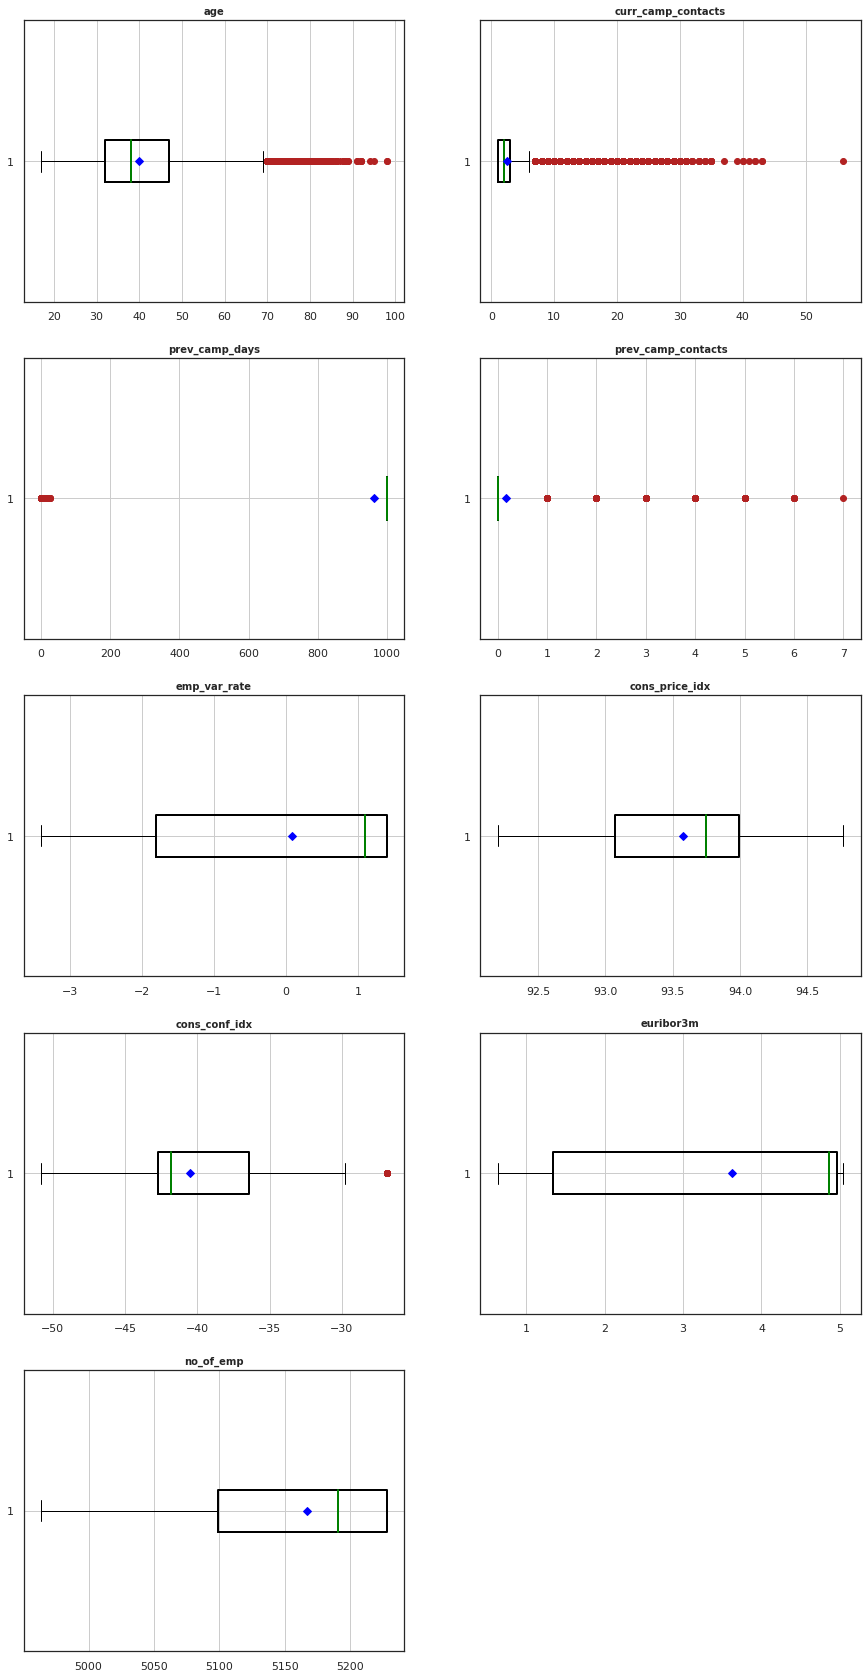

In [ ]:
#Outlier Detection
fig =plt.figure(figsize=(15,30))
numcol_dict={'age':1,'curr_camp_contacts':2,'prev_camp_days':3,'prev_camp_contacts':4,'emp_var_rate':5,'cons_price_idx':6,'cons_conf_idx':7,'euribor3m':8,'no_of_emp':9}
numcol_dict.items()
circle = dict(markerfacecolor='firebrick', marker='o', markeredgecolor='firebrick')
mean = dict(markerfacecolor='blue', marker='D', markeredgecolor='blue')
box = dict( linewidth=2)
median = dict(linewidth=2, color='green')

for feature,i in numcol_dict.items():
  plt.subplot(5,2,i)
  plt.boxplot(bank_df[feature],flierprops=circle,showmeans=True, meanprops=mean,vert=False,boxprops=box,medianprops=median)
  plt.title(feature,fontsize=10,fontweight='bold')
  plt.grid(True)

#Variables with outliers:
#age, curr_camp_contacts, prev_camp_days, prev_camp_contacts, cons_conf_idx

In [ ]:
#Finding the lower and upper limits for the features with outliers
def limits(data, feature):
  Q1=data[feature].quantile(.25)
  Q3=data[feature].quantile(.75)
  IQR=Q3-Q1
  lower_limit=Q1-(1.5*IQR)
  upper_limit=Q3+(1.5*IQR)
  return(lower_limit,upper_limit)

lower_cons_conf_idx, upper_cons_conf_idx=limits(bank_df,'cons_conf_idx')
lower_age, upper_age=limits(bank_df,'age')
lower_prev_camp_days, upper_prev_camp_days=limits(bank_df,'prev_camp_days')
lower_prev_camp_contacts, upper_prev_camp_contacts=limits(bank_df,'prev_camp_contacts')
lower_curr_camp_contacts, upper_curr_camp_contacts=limits(bank_df,'curr_camp_contacts')

print("upper and lower limits of age: ",lower_age,upper_age)
print("lower and upper limits of cons_conf_idx: ",lower_cons_conf_idx, upper_cons_conf_idx)
print("lower and upper limits of prev_camp_days: ",lower_prev_camp_days, upper_prev_camp_days)
print("lower and upper limits of prev_camp_contacts: ",lower_prev_camp_contacts, upper_prev_camp_contacts)
print("lower and upper limits of curr_camp_contacts: ",lower_curr_camp_contacts, upper_curr_camp_contacts)

#From the below output we can see that the lower and upper limits for the features prev_camp_days
#and prev_camp_conatcts are same, capping will result in replacing all the records with one value hence
#binning is considered for these variables

upper and lower limits of age:  9.5 69.5
lower and upper limits of cons_conf_idx:  -52.150000000000006 -26.949999999999992
lower and upper limits of prev_camp_days:  999.0 999.0
lower and upper limits of prev_camp_contacts:  0.0 0.0
lower and upper limits of curr_camp_contacts:  -2.0 6.0


(array([False,  True]), array([40730,   446]))
(array([False,  True]), array([40708,   468]))
(array([False,  True]), array([38770,  2406]))


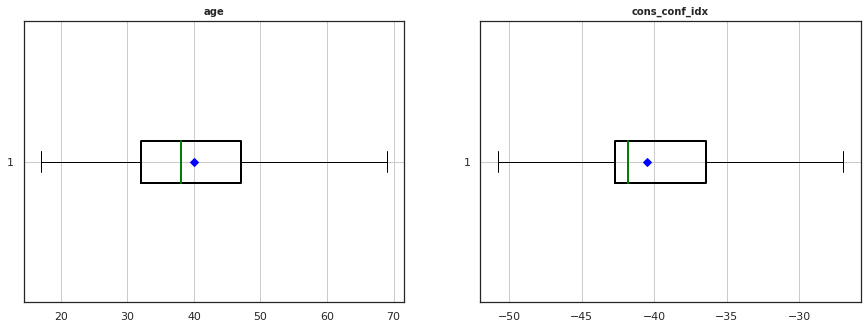

In [ ]:
#Identifying the number of outliers for the variables age, cons_conf_idx and curr_camp_contacts
vars_outliers=[['cons_conf_idx',lower_cons_conf_idx, upper_cons_conf_idx],['age',lower_age, upper_age],['curr_camp_contacts',lower_curr_camp_contacts, upper_curr_camp_contacts]]
for feature,lower,upper in vars_outliers:
  outliers=np.where(bank_df[feature]>upper,True,np.where(bank_df[feature]<lower,True, False))
  print(np.unique(outliers,return_counts = True))

#Using capping method for treating outliers for the features age and cons_conf_idx
bank_df['age']=np.where(bank_df['age']>69,69,np.where(bank_df['age']<9.5,9,bank_df['age']))
bank_df['cons_conf_idx']=np.where(bank_df['cons_conf_idx']>upper_cons_conf_idx,upper_cons_conf_idx,np.where(bank_df['cons_conf_idx']< lower_cons_conf_idx,lower_cons_conf_idx,bank_df['cons_conf_idx']))

#Plotting boxplots to check if the outliers are treated for the features age and cons_conf_idx
fig =plt.figure(figsize=(15,30))
numcol_dict={'age':1,'cons_conf_idx':2}
numcol_dict.items()
circle = dict(markerfacecolor='firebrick', marker='o', markeredgecolor='firebrick')
mean = dict(markerfacecolor='blue', marker='D', markeredgecolor='blue')
box = dict( linewidth=2)
median = dict(linewidth=2, color='green')

for feature,i in numcol_dict.items():
  plt.subplot(5,2,i)
  plt.boxplot(bank_df[feature],flierprops=circle,showmeans=True, meanprops=mean,vert=False,boxprops=box,medianprops=median)
  plt.title(feature,fontsize=10,fontweight='bold')
  plt.grid(True)

In [ ]:
#Using Binning to treat the outliers for the remaining three variables

#Binning prev_camp_contacts
print(bank_df['prev_camp_contacts'].value_counts())
bank_df['prev_camp_contacts']=np.where(bank_df['prev_camp_contacts']>1,"2 to 7",bank_df['prev_camp_contacts'])
print(bank_df['prev_camp_contacts'].value_counts())

bank_df['prev_camp_contacts']=bank_df['prev_camp_contacts'].astype('object')

#Binning prev_camp_days
print(bank_df['prev_camp_days'].value_counts())
bank_df['prev_camp_days']=pd.cut(x=bank_df['prev_camp_days'], bins=[0, 5, 10, 20, 30],labels=['0 to 5', '6 to 10', '11 to 20','21 to 30'], include_lowest=True)
bank_df['prev_camp_days']=np.where(bank_df['prev_camp_days'].isnull(),'not contacted',bank_df['prev_camp_days'])
print(bank_df['prev_camp_days'].value_counts())

bank_df['prev_camp_days']=bank_df['prev_camp_days'].astype('object')

#Binning curr_camp_contacts
print(bank_df['curr_camp_contacts'].value_counts())
bank_df['curr_camp_contacts']=np.where(bank_df['curr_camp_contacts']<6,"1 to 5",">5")
print(bank_df['curr_camp_contacts'].value_counts())

bank_df['curr_camp_contacts']=bank_df['curr_camp_contacts'].astype('object')


0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: prev_camp_contacts, dtype: int64
0         35551
1          4561
2 to 7     1064
Name: prev_camp_contacts, dtype: int64
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: prev_camp_days, dtype: int64
not contacted    39661
0 to 5             705
6 to 10            606
11 to 20           196
21 to 30             8
Name: prev_camp_days, dtype: int64
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       2

**Exploratory Data Analysis**

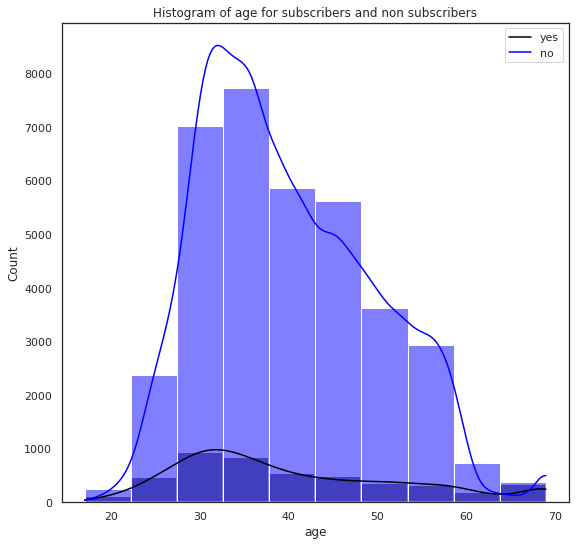

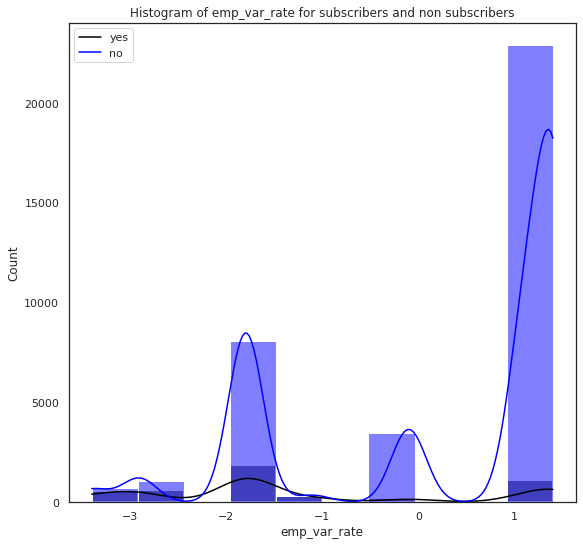

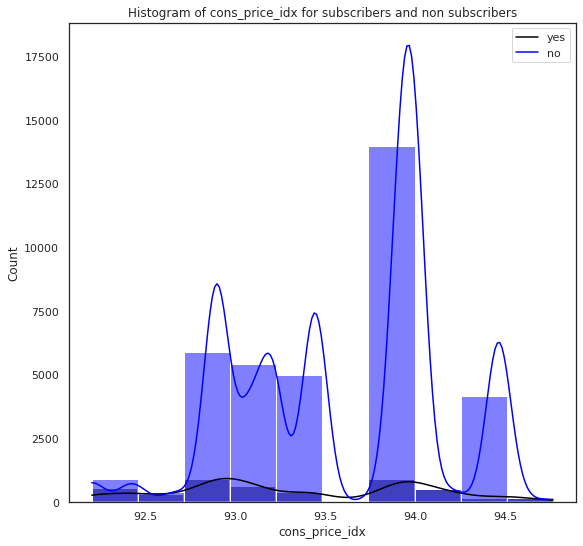

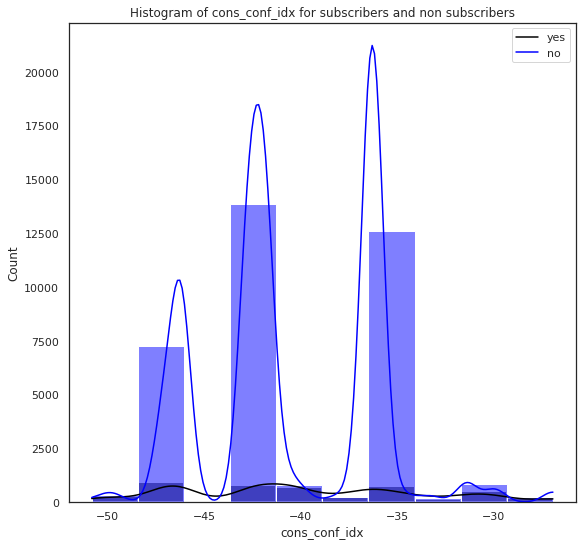

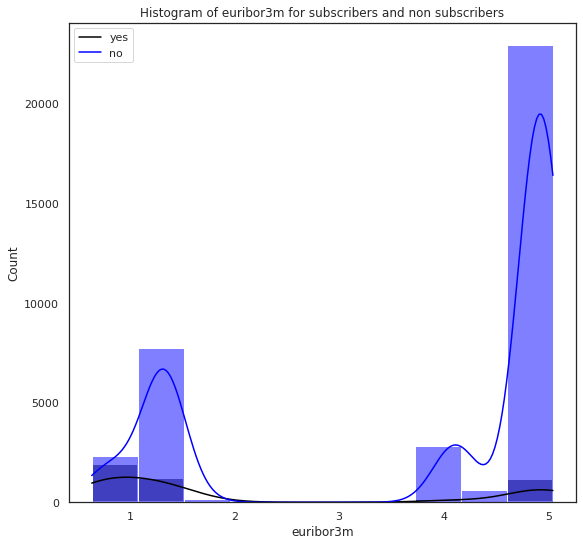

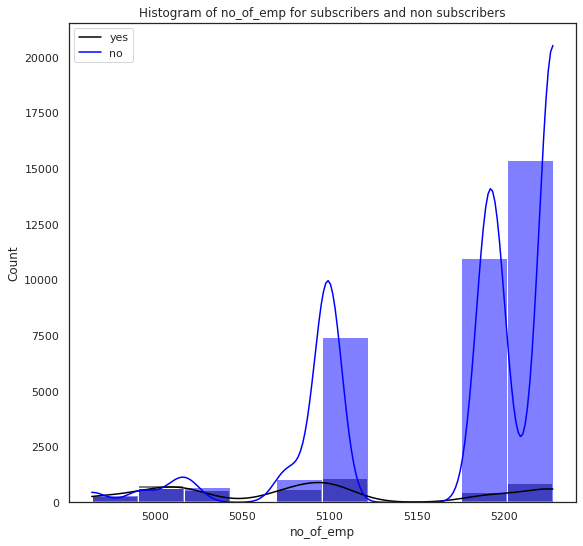

In [ ]:
#Plotting bivariate histograms to understand the distribution of the numeric variables for each level 
#of the dependent variable (Yes/No)
numcol_dict={'age':1,'emp_var_rate':2,'cons_price_idx':3,'cons_conf_idx':4,'euribor3m':5,'no_of_emp':6}
for feature,i in numcol_dict.items():
  plt.figure(figsize=(20,30))
  plt.subplot(3,2,i)
  hist1 = sns.histplot(bank_df[feature][bank_df.curr_camp_outcome == "yes"], color="black", kde=True,bins=10,linewidth=2)
  sns.histplot(bank_df[feature][bank_df.curr_camp_outcome == "no"], color="blue", kde=True,bins=10)
  plt.title('Histogram of {} for subscribers and non subscribers'.format(feature))
  plt.legend(['yes', 'no'])
  sns.set(style="white")
  plt.show()

<Figure size 1440x2160 with 0 Axes>

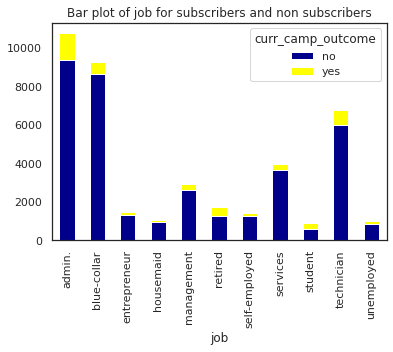

<Figure size 1440x2160 with 0 Axes>

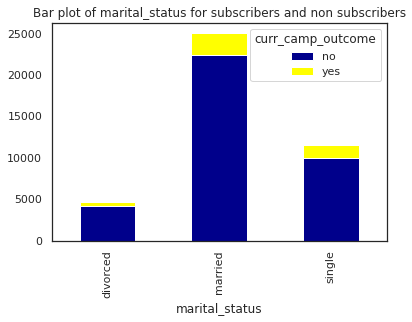

<Figure size 1440x2160 with 0 Axes>

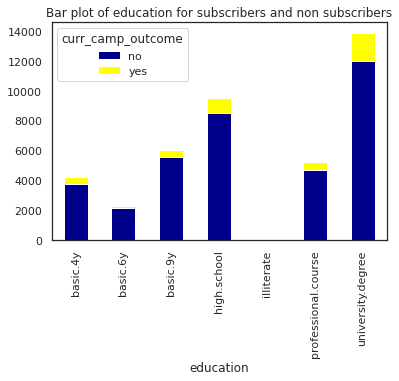

<Figure size 1440x2160 with 0 Axes>

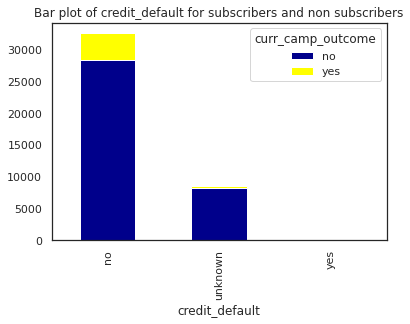

<Figure size 1440x2160 with 0 Axes>

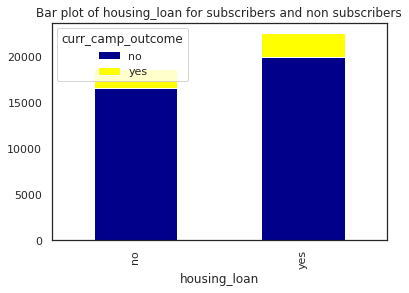

<Figure size 1440x2160 with 0 Axes>

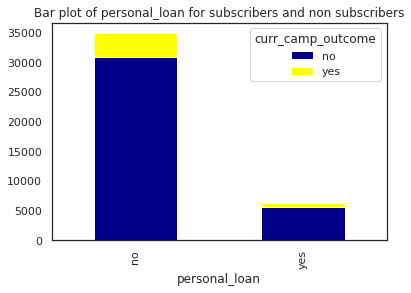

<Figure size 1440x2160 with 0 Axes>

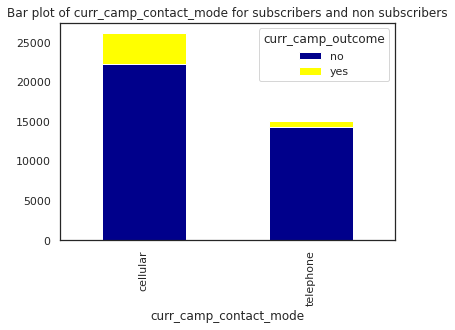

<Figure size 1440x2160 with 0 Axes>

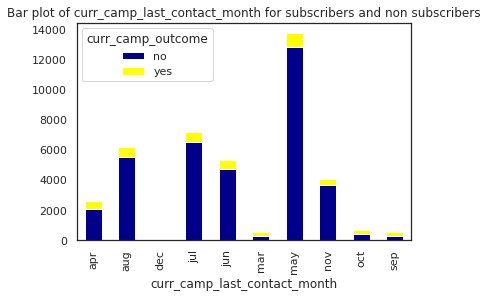

<Figure size 1440x2160 with 0 Axes>

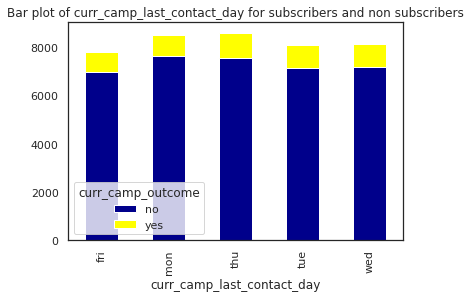

<Figure size 1440x2160 with 0 Axes>

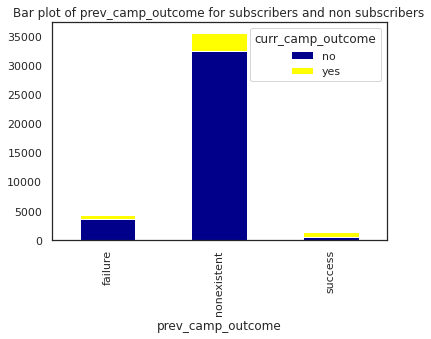

<Figure size 1440x2160 with 0 Axes>

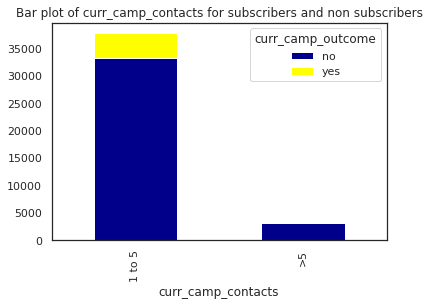

<Figure size 1440x2160 with 0 Axes>

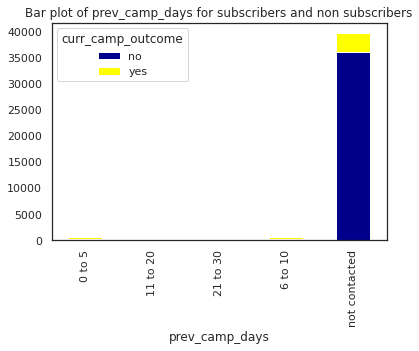

<Figure size 1440x2160 with 0 Axes>

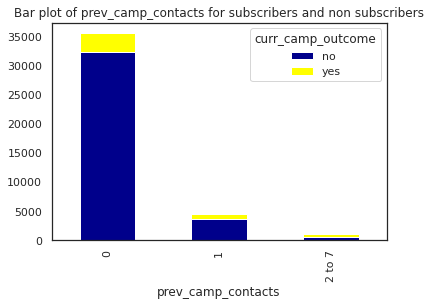

In [ ]:
#Plotting stacked bar plots to understand the distribution of the categorical variables for each level 
#of the dependent variable (Yes/No)

charcol_dict={'job':1,'marital_status':2,'education':3,'credit_default':4,'housing_loan':5,'personal_loan':6,'curr_camp_contact_mode':7,'curr_camp_last_contact_month':8,'curr_camp_last_contact_day':9,'prev_camp_outcome':10,'curr_camp_contacts':11,'prev_camp_days':12,'prev_camp_contacts':13}

for feature,i in charcol_dict.items():
  plt.figure(figsize=(20,30))
  pd.crosstab(bank_df[feature],bank_df['curr_camp_outcome']).plot(kind="bar",stacked=True,color=['darkblue','yellow'])
  plt.title('Bar plot of {} for subscribers and non subscribers'.format(feature))
  plt.show()

**Checking for Multicollinearity using Heatmaps and Variance Inflation Factor (VIF)**

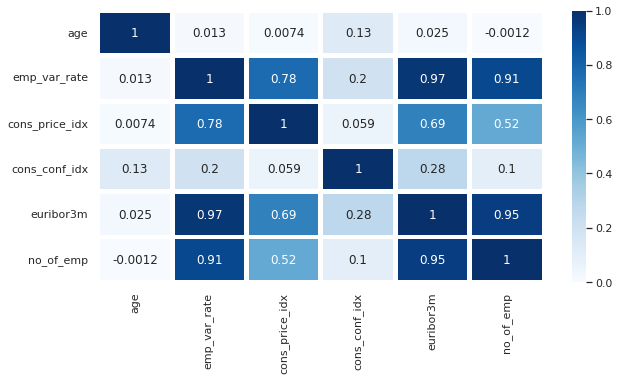

In [ ]:
#Plotting of heatmap to detect multicollinearity between independent numeric variables
plt.figure(figsize=(10,5))
sns.heatmap(bank_df.corr(), annot=True,linewidths=4, cmap='Blues')

#A threshold of 0.7 was used to detect multicollinearity thus correlation coefficient>0.7 indicates multicollinearity

#The below variables are multicollinear:
#emp_var_rate and euribor3m
#emp_var_rate and no_of_emp
#emp_var_rate and cons_price_idx
#euribor3m and no_of_emp

In [ ]:
#Using variance inflation factor on the above 4 multicollinear variables

#VIF >= 5 indicates multicollinearity

def vif(features,data):
    
    indep_vars = data[features]
    indep_vars['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = indep_vars.columns
    vif["VIF"] = [variance_inflation_factor(indep_vars.values, i) for i in range(indep_vars.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# List of features with VIF >= 5
multi_features = ['emp_var_rate', 'euribor3m', 'no_of_emp', 'cons_price_idx']

# Computing variance inflation factor and stepwise removal of the variables with highest VIF
print("First iteration \n",vif(multi_features,bank_df).sort_values('VIF', ascending=False),"\n")
multi_features.remove('emp_var_rate')
print("Second iteration \n", vif(multi_features,bank_df).sort_values('VIF', ascending=False),"\n")
multi_features.remove('euribor3m')
print("Third iteration \n",vif(multi_features,bank_df).sort_values('VIF', ascending=False))

#Dropping the variables euribor3m and emp_var_rate from the dataset due to presence of multicollinearity
bank_df.drop(['euribor3m','emp_var_rate'], axis=1,inplace=True)


First iteration 
          Variable        VIF
0    emp_var_rate  32.548712
1       euribor3m  31.145771
2       no_of_emp  14.391291
3  cons_price_idx   4.676288 

Second iteration 
          Variable        VIF
0       euribor3m  18.345790
1       no_of_emp  13.273412
2  cons_price_idx   2.690423 

Third iteration 
          Variable       VIF
1  cons_price_idx  1.374432
0       no_of_emp  1.374432


In [ ]:
#Computing Variance Inflation Factor for categorical variables
obj_df = bank_df.select_dtypes(include='object').copy()
obj_df.drop('curr_camp_outcome',axis=1,inplace=True)
obj_df.columns

#Converting the categorical columns to numeric using label encoding
le = preprocessing.LabelEncoder()
obj_df = obj_df.apply(le.fit_transform)
obj_df.dtypes

#List of features for which VIF needs to be computed
features = ['job', 'marital_status', 'education', 'credit_default', 'housing_loan','personal_loan', 'curr_camp_contact_mode','curr_camp_last_contact_month', 'curr_camp_last_contact_day','prev_camp_outcome','curr_camp_contacts','prev_camp_days','prev_camp_contacts']

#Computing VIF 
print(vif(features,obj_df).sort_values('VIF', ascending=False))

#The VIF values for all categorical features is < 5 thus no variables are discarded

                        Variable       VIF
11                prev_camp_days  3.481260
12            prev_camp_contacts  3.323663
9              prev_camp_outcome  3.072464
6         curr_camp_contact_mode  1.206412
7   curr_camp_last_contact_month  1.134657
2                      education  1.079888
3                 credit_default  1.068170
0                            job  1.019324
1                 marital_status  1.018299
10            curr_camp_contacts  1.010605
4                   housing_loan  1.007546
8     curr_camp_last_contact_day  1.002377
5                  personal_loan  1.001894


**Feature Selection Using Stepwise Regression**

In [ ]:
#Stepwise Regression for feature selection
num_df = bank_df.select_dtypes(exclude=['object'])
char_df = bank_df.select_dtypes(include=['object'])
char_df = char_df.apply(le.fit_transform)
encoded_data=pd.concat([num_df, char_df], axis=1)

indep_vars=['age', 'job', 'marital_status', 'education', 'credit_default','housing_loan', 'personal_loan', 'curr_camp_contact_mode','curr_camp_last_contact_month', 'curr_camp_last_contact_day','curr_camp_contacts', 'prev_camp_days', 'prev_camp_contacts','prev_camp_outcome', 'cons_price_idx', 'cons_conf_idx', 'no_of_emp']
dep_var=encoded_data['curr_camp_outcome']

def get_stats():
    x = encoded_data[indep_vars]
    results = sm.OLS(dep_var, x).fit()
    print(results.summary())
get_stats()

#Features with p value < 0.05 are statistically sigficant thus dropping the variables with p value > 0.05
#Dropping housing_loan
indep_vars=['age', 'job', 'marital_status', 'education', 'credit_default', 'personal_loan', 'curr_camp_contact_mode','curr_camp_last_contact_month', 'curr_camp_last_contact_day','curr_camp_contacts', 'prev_camp_days', 'prev_camp_contacts','prev_camp_outcome', 'cons_price_idx', 'cons_conf_idx', 'no_of_emp']
get_stats()
#Drpping personal_loan
indep_vars=['age', 'job', 'marital_status', 'education', 'credit_default', 'curr_camp_contact_mode','curr_camp_last_contact_month', 'curr_camp_last_contact_day','curr_camp_contacts', 'prev_camp_days', 'prev_camp_contacts','prev_camp_outcome', 'cons_price_idx', 'cons_conf_idx', 'no_of_emp']
get_stats()
#Dropping job
indep_vars=['age', 'marital_status', 'education', 'credit_default', 'curr_camp_contact_mode','curr_camp_last_contact_month', 'curr_camp_last_contact_day','curr_camp_contacts', 'prev_camp_days', 'prev_camp_contacts','prev_camp_outcome', 'cons_price_idx', 'cons_conf_idx', 'no_of_emp']
get_stats()

#Dropping housing_loan, personal_loan and job from the original dataset
bank_df.drop(['job','housing_loan', 'personal_loan'],axis=1, inplace=True)
bank_df.columns
bank_df.shape

#At this stage the data has been cleaned/processed and is ready to be used for model building


                                 OLS Regression Results                                
Dep. Variable:      curr_camp_outcome   R-squared (uncentered):                   0.280
Model:                            OLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              939.8
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:12:51   Log-Likelihood:                         -6722.8
No. Observations:               41176   AIC:                                  1.348e+04
Df Residuals:                   41159   BIC:                                  1.363e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

(41176, 15)

**Label Encoding**

This approach is very simple and it involves converting each value in a column to a number.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
preprocessed_df = bank_df.apply(le.fit_transform)
preprocessed_df

age  marital_status  education  credit_default  curr_camp_contact_mode  \
0       39               1          0               0                       1   
1       40               1          3               1                       1   
2       20               1          3               0                       1   
3       23               1          1               0                       1   
4       39               1          3               0                       1   
...    ...             ...        ...             ...                     ...   
41183   52               1          5               0                       0   
41184   29               1          5               0                       0   
41185   39               1          6               0                       0   
41186   27               1          5               0                       0   
41187   52               1          5               0                       0   

       curr_camp_last_contact_month  curr_camp_last_contact_day  \
0                                 6                           1   
1                                 6                           1   
2                                 6                           1   
3                                 6                           1   
4                                 6                           1   
...                             ...                         ...   
41183                             7                           0   
41184                             7                           0   
41185                             7                           0   
41186                             7                           0   
41187                             7                           0   

       curr_camp_contacts  prev_camp_days  prev_camp_contacts  \
0                       0               4                   0   
1                       0               4                   0   
2                       0               4                   0   
3                       0               4                   0   
4                       0               4                   0   
...                   ...             ...                 ...   
41183                   0               4                   0   
41184                   0               4                   0   
41185                   0               4                   0   
41186                   0               4                   0   
41187                   0               4                   1   

       prev_camp_outcome  cons_price_idx  cons_conf_idx  no_of_emp  \
0                      1              18             16          8   
1                      1              18             16          8   
2                      1              18             16          8   
3                      1              18             16          8   
4                      1              18             16          8   
...                  ...             ...            ...        ...   
41183                  1              25              0          0   
41184                  1              25              0          0   
41185                  1              25              0          0   
41186                  1              25              0          0   
41187                  0              25              0          0   

       curr_camp_outcome  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
41183                  1  
41184                  0  
41185                  0  
41186                  1  
41187                  0  

[41176 rows x 15 columns]

Splitting the dataset into two as train and test data. We will use the training data set to train the model and then use the test data set to predict using the trained model

In [ ]:
X = preprocessed_df.iloc[:, 1:-1].values
y = preprocessed_df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**SMOTE**

SMOTE (Synthetic Minority Oversampling Technique) is the most commonly used oversampling methods to solve the imbalance problems. It aims to balance class distribution by randomly increasing minority class by replicating them.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3672
Before OverSampling, counts of label '0': 29268 

After OverSampling, the shape of train_X: (58536, 13)
After OverSampling, the shape of train_y: (58536,) 

After OverSampling, counts of label '1': 29268
After OverSampling, counts of label '0': 29268


**Model Building**

Creating and training the model using the oversampled training dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_res, y_train_res)

LogisticRegression(random_state=0)

Predicting using the test data with the help of the model built and finding the score.

In [ ]:
y_pred = classifier.predict(X_test)
print("Accuracy on training set:", classifier.score(X_train_res, y_train_res)*100,'%')
print("Accuracy on test set:", classifier.score(X_test, y_test)*100,'%')

Accuracy on training set: 74.22782561158945 %
Accuracy on test set: 80.37882467217095 %


**Model Evaluation**

Evaluating the model using confusion matrix and classification report

In [ ]:
from sklearn.metrics import confusion_matrix
cmsgd = confusion_matrix(y_test, y_pred)
print(cmsgd)

[[5987 1282]
 [ 334  633]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7269
           1       0.33      0.65      0.44       967

    accuracy                           0.80      8236
   macro avg       0.64      0.74      0.66      8236
weighted avg       0.87      0.80      0.83      8236



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

**Logistic Regression with Stochastic gradient descent (SGD)**

Stochastic gradient descent (SGD) is an optimization algorithm used in machine learning applications to find the model parameters that corresponds to the best fit between predict and actual outputs.

In [ ]:
#Implementing Logistic Regression with Regularization
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=50000,random_state=1)

distributions = dict(C=uniform(loc=0, scale=6),penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=1)

#search = clf.fit(X_train_res, y_train_res)
search = clf.fit(X_scale, y)

best_param = clf.best_params_
print("Best parameters: ", best_param)

best_result = clf.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

best_model = clf.best_estimator_
print("Intercept: ", best_model.intercept_)

Best parameters:  {'C': 1.8139954357910386, 'penalty': 'l1'}
Best result:  0.8174647887323943
Intercept:  [-2.48050789]


Score after stochastic gradient descent

In [ ]:
y_pred_sgd = clf.predict(X_test)
print("Accuracy on training set:", clf.score(X_train_res, y_train_res)*100,'%')
print("Accuracy on test set:", clf.score(X_test, y_test)*100,'%')

Accuracy on training set: 50.0 %
Accuracy on test set: 88.25886352598349 %
